In [1]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
from sklearn.model_selection import  train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [12]:
K = np.random.randint(1,15)

In [13]:
# generate synthetic two-dimensional data 
X, y = make_blobs(n_samples = 1000, centers=K, random_state=1) # build the clustering model 

In [14]:
X.shape

(1000, 2)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

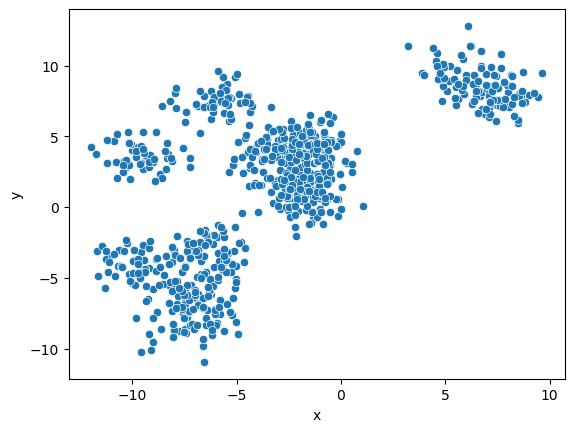

In [16]:
sns.scatterplot(pd.DataFrame(X_train, columns=["x","y"]),x="x",y="y")
plt.show()

In [17]:
from sklearn.cluster import KMeans
elbow = [] 
for i in range(1, 15): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    elbow.append(kmeans.inertia_)

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

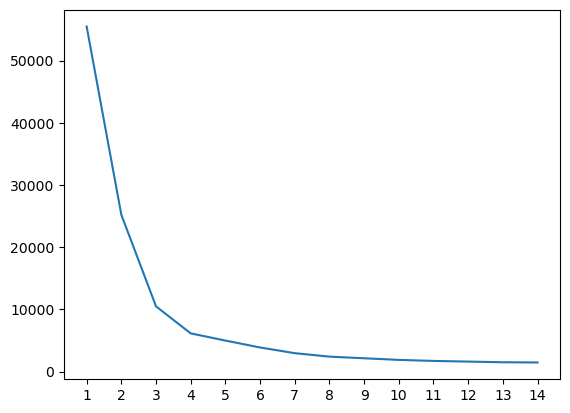

In [20]:
plt.figure()
plt.plot(elbow)
plt.xticks(np.arange(0,14),np.arange(1,15))
plt.savefig("elbow.png")
plt.show()

In [21]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(X_train)

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=4)

In [22]:
 kmeans.predict([[1,1]])

array([2])

In [23]:
y_train_hat = kmeans.predict(X_train)

In [24]:
df_concat = pd.DataFrame(np.hstack([X_train,np.expand_dims(y_train_hat,axis=1)]), columns=["x","y","class"])

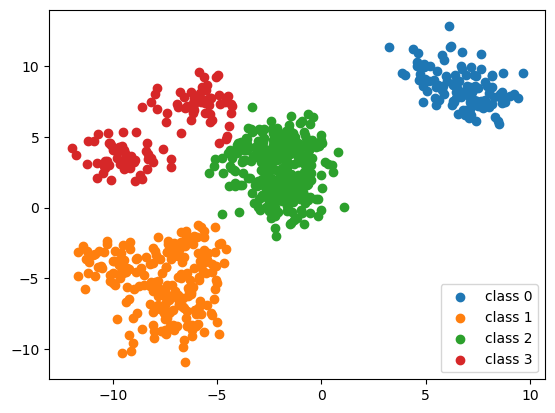

In [25]:
plt.figure()
for i in sorted(df_concat["class"].unique().astype(int)):
    plt.scatter(x=df_concat[df_concat["class"]==i].iloc[:,0], y=df_concat[df_concat["class"]==i].iloc[:,1], color="C{}".format(i), label="class {}".format(i))
plt.legend()

<IPython.core.display.Javascript object>


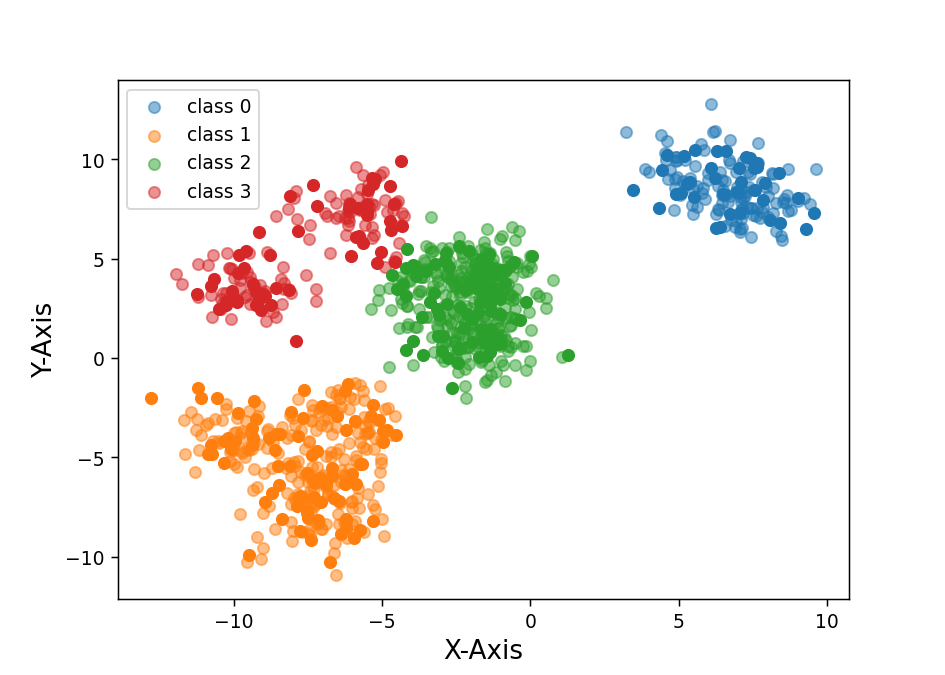

In [26]:
%matplotlib notebook

figure, ax = plt.subplots(figsize=(7,5))
plt.ion()


for i in sorted(df_concat["class"].unique().astype(int)):
    ax.scatter(x=df_concat[df_concat["class"]==i].iloc[:,0], y=df_concat[df_concat["class"]==i].iloc[:,1], color="C{}".format(i), label="class {}".format(i), alpha=0.5)


plt.xlabel("X-Axis",fontsize=14)
plt.ylabel("Y-Axis",fontsize=14)
plt.legend()

for j in X_test:

    plt.scatter(x=j[0],y=j[1], color="C{}".format(kmeans.predict(np.expand_dims(j,0))[0]))
    figure.canvas.draw()
    figure.canvas.flush_events()
    #time.sleep(0.1)
    